<a href="https://colab.research.google.com/github/PhanQuangTan/CS114.K21/blob/master/PredictTheTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kết nối với drive

In [ ]:
 # Kết nối google colab với drive để load dataset
from google.colab import drive
drive.mount('/content/drive') # Kết nối với drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hàm đọc file và file về drive

In [ ]:
import requests # Thư viện request là mô-đun được sử dụng để gửi yêu cầu HTTP.
file_url = 'https://cs.uit.edu.vn/data2.txt'# Địa chỉ URL cần gửi request.
r = requests.get(file_url, stream = True)     # Gửi một yêu cầu HTTP GET requests tới địa chỉ.
with open('/content/drive/My Drive/Dataset/data2.txt', 'wb') as file: # Tạo 1 file data2.txt trong drive và mở file ở chế độ ghi.
  for block in r.iter_content(chunk_size = 1024): # Vòng for dùng để đọc file với sô byte mỗi lần đọc là 1024 byte.
    if block:
      file.write(block) # Ghi dữ liệu vào file data.txt.
# Nguồn: https://anonyviet.com/huong-dan-dung-colab-de-download-file-ve-google-drive/

In [ ]:
import numpy as np # Thư viện numpy dùng để xử lý trên mảng nhiều chiều.
import pandas as pd # Thư viện pandas giúp phân tich và xử lý dữ liệu.

In [ ]:
def paretxt(fname): 
  for line in open(fname, 'r'): # Đọc từng dòng dữ liệu.
    yield eval(line) # Đọc từng hàng dữ liệu trên dòng.

# Hàm đọc dữ liệu và đưa vào mảng

In [ ]:

file_name = '/content/drive/My Drive/Dataset/data2.txt'
data = list(paretxt(file_name)) # Load dữ liệu và lít data

In [ ]:
df = pd.DataFrame(data) # Chuyển DataFrame từ  list data sang biến lưu trữ df của pandas.
df.columns=['size', 'time'] # Đặt tên cho hai cột.

In [ ]:
from sklearn.model_selection import train_test_split # Thêm hàm từ thư viện sklearn để chia dữ liệu dùng để train và test.
import matplotlib.pyplot as plt # Thêm thứ viên  matplotlib đề vễ biểu đồ.

In [ ]:
X = df['size'] # Gán dữ liệu từ cột size vào list X.
y = df['time'] # Gán dữ liệu từ cột time vào list y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Phân chia dữ liệu để trai và test với tỉ lệ 80% train và 20% test

In [ ]:
from sklearn import linear_model # Thêm model từ trong thư viện.
regr = linear_model.LinearRegression()

In [ ]:
X_train = X_train.values.reshape(-1, 1) # Chuyển vị ma trận.
X_test = X_test.values.reshape(-1, 1)

In [ ]:
regr.fit(X_train, y_train) # Thực hiện việc train model với bộ dữ liệu dùng để train.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = regr.predict(X_test)

In [ ]:
print('He So: \n', regr.coef_)

He So: 
 [8.45606811e-08]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Thêm hàm để tính giá trị MSE và hàm tính tỉ lệ giữa kết quả dự đoán và kết quả trong bộ dữ liệu test

In [ ]:
print('He so xac dinh: %.10f' % r2_score(y_test, pred)) # Độ chính xác của model khi dự đoán dữ liệu test

He so xac dinh: 0.9974404168


In [ ]:
print('Loi binh phuong: %.10f' % mean_squared_error(y_test, pred)) # Tính MSE

Loi binh phuong: 0.0001522917


In [ ]:
import math

In [ ]:
c = np.mean(y_test)
print(c)
er = math.sqrt(mean_squared_error(y_test, pred))
print('%10f' % er)

0.40617171433480914
  0.012341


# Đánh giá model thông qua giá trị MSE = 0.000152291 và độ chính xác: 0.9974404168
# Model có độ chính xác khoảng 99,74% nhưng tỉ lệ lỗi là 0.012341 nên model dữ đoán trên thực sự là không tốt lắm.

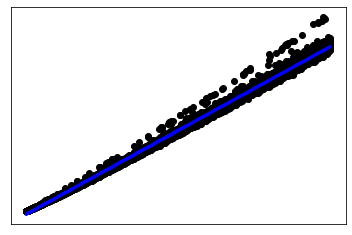

In [ ]:

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# Dùng model trên sau đó nhập data chưa mới vào đó.
# Ứng dụng đơn giản của model trên.

In [ ]:
X_new = float(input("Nhập giá trị bạn muốn dự đoán : \n"))

y_pred = my_model.predict([[X_new]])

print('Thời gian chạy là : %.10f' % Y_pred)